In [1]:
%matplotlib inline
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/dark-flowers.jpg')

In [3]:
image_gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

In [4]:
#histogram equalization of grayscale image
image_gray_eq = cv2.equalizeHist(image_gray)

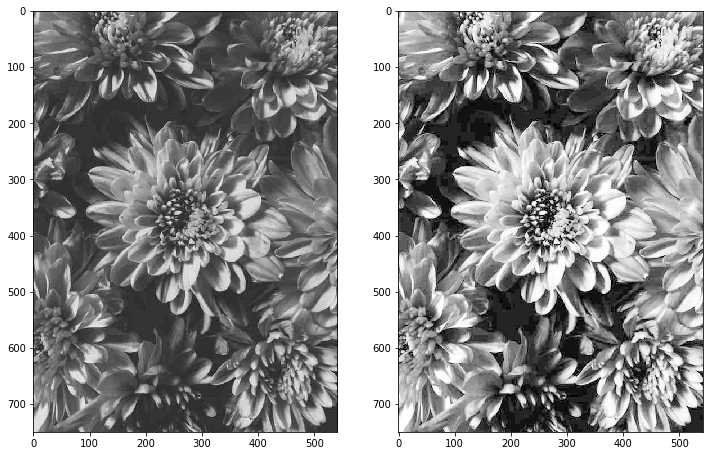

In [5]:
plt.figure(figsize = (12,12))
plt.subplot(121)
plt.imshow(image_gray,cmap = 'gray')
plt.subplot(122)
plt.imshow(image_gray_eq,cmap = 'gray')

(-0.5, 541.5, 749.5, -0.5)

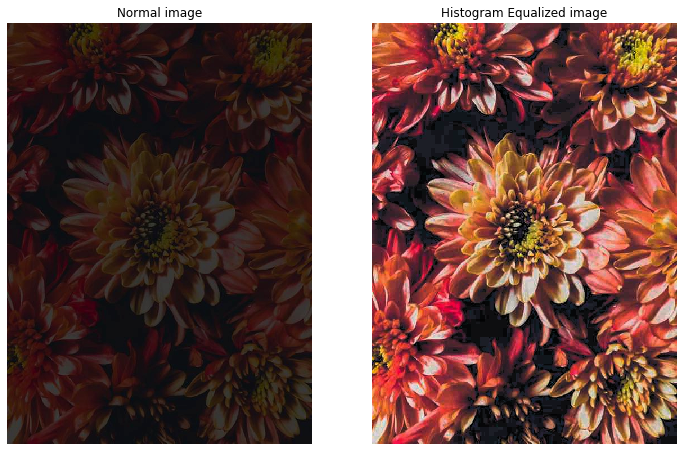

In [6]:
#Equalizing histogram of a color image
plt.figure(figsize = (12,12))
image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)

image_hsv_equalized = image_hsv.copy()
image_hsv_equalized[:,:,2] = cv2.equalizeHist(image_hsv_equalized[:,:,2])

image_bgr = cv2.cvtColor(image_hsv,cv2.COLOR_HSV2BGR)
image_bgr_equalized = cv2.cvtColor(image_hsv_equalized,cv2.COLOR_HSV2BGR)

plt.subplot(121)
plt.imshow(image_bgr[:,:,::-1]);
plt.title("Normal image");
plt.axis('off')
plt.subplot(122)
plt.imshow(image_bgr_equalized[:,:,::-1]);
plt.title("Histogram Equalized image");
plt.axis('off')

In [7]:
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/night-sky.jpg')

(-0.5, 666.5, 999.5, -0.5)

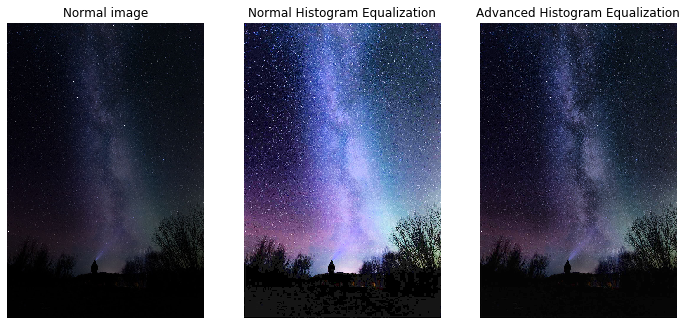

In [8]:
image_hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
image_hsv_clahe = image_hsv.copy()

#equalizing with normal histogram equalization method
image_hsv[:,:,2] = cv2.equalizeHist(image_hsv[:,:,2])
#Advanced histogram equalization
clahe = cv2.createCLAHE(clipLimit = 2, tileGridSize=(7,7))
image_hsv_clahe[:,:,2] = clahe.apply(image_hsv_clahe[:,:,2])

#Convert the images back to bgr format
image_eq_bgr = cv2.cvtColor(image_hsv,cv2.COLOR_HSV2BGR)
image_eq_clahe = cv2.cvtColor(image_hsv_clahe,cv2.COLOR_HSV2BGR)

plt.figure(figsize=(12,12))
plt.subplot(131)
plt.imshow(image[:,:,::-1])
plt.title("Normal image")
plt.axis('off')

plt.subplot(132)
plt.imshow(image_eq_bgr[:,:,::-1])
plt.title("Normal Histogram Equalization")
plt.axis('off')

plt.subplot(133)
plt.imshow(image_eq_clahe[:,:,::-1])
plt.title("Advanced Histogram Equalization")
plt.axis('off')

In [9]:
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/girl.jpg')

(-0.5, 939.5, 626.5, -0.5)

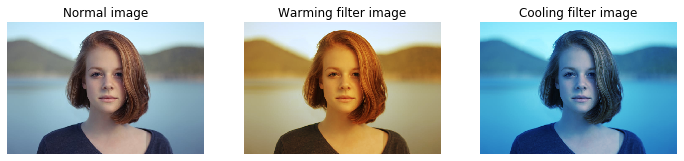

In [10]:
# pivot points for X-Coordinates
original_value = np.array([0, 50, 100, 150, 200, 255])

# Changed points on Y-axis for each channel
rcurve = np.array([0, 80, 150, 190, 220, 255])
bcurve = np.array([0, 20,  40,  75, 150, 255]) 

rLUT = np.interp(np.arange(0,256),original_value,rcurve)
bLUT = np.interp(np.arange(0,256),original_value,bcurve)

image_color_tone = image.copy()
image_color_tone_cool = image.copy()
image_color_tone[:,:,0] = cv2.LUT(image_color_tone[:,:,0],bLUT)
image_color_tone[:,:,2] = cv2.LUT(image_color_tone[:,:,2],rLUT)

image_color_tone_cool[:,:,0] = cv2.LUT(image_color_tone_cool[:,:,0],rLUT)
image_color_tone_cool[:,:,2] = cv2.LUT(image_color_tone_cool[:,:,2],bLUT)



plt.figure(figsize = (12,12))

plt.subplot(131)
plt.imshow(image[:,:,::-1])
plt.title("Normal image")
plt.axis('off')

plt.subplot(132)
plt.imshow(image_color_tone[:,:,::-1])
plt.title("Warming filter image")
plt.axis('off')

plt.subplot(133)
plt.imshow(image_color_tone_cool[:,:,::-1])
plt.title("Cooling filter image")
plt.axis('off')

In [11]:
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/sample.jpg')

In [12]:
kernel = np.ones((10,10),dtype = "float32")/(10**2)

In [13]:
conv_image = cv2.filter2D(image,-1,kernel)

(-0.5, 511.5, 511.5, -0.5)

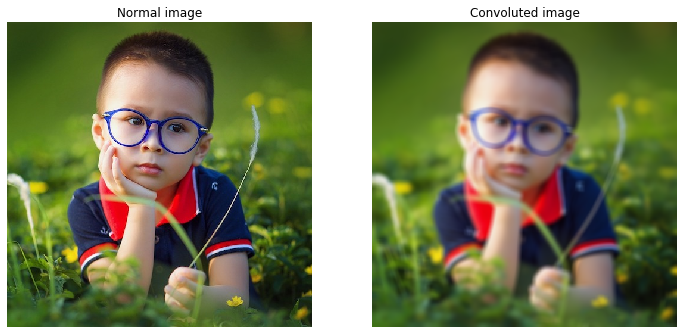

In [14]:
#Convolution with the box filter
plt.figure(figsize = (12,12))

plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.title("Normal image")
plt.axis('off')

plt.subplot(122)
plt.imshow(conv_image[:,:,::-1])
plt.title("Convoluted image")
plt.axis('off')

In [15]:
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/salt-and-pepper.png')

(-0.5, 511.5, 511.5, -0.5)

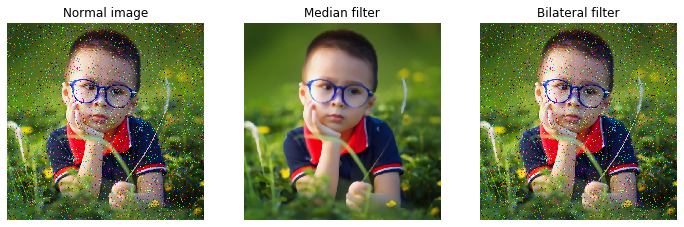

In [16]:
image_median = cv2.medianBlur(image,7)
image_bilateral = cv2.bilateralFilter(image,-1,4,4)

plt.figure(figsize = (12,12))
plt.subplot(131)
plt.imshow(image[:,:,::-1])
plt.title('Normal image')
plt.axis('off')

plt.subplot(132)
plt.imshow(image_median[:,:,::-1])
plt.title('Median filter')
plt.axis('off')

plt.subplot(133)
plt.imshow(image_bilateral[:,:,::-1])
plt.title('Bilateral filter')
plt.axis('off')

In [17]:
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/gaussian-noise.png')
if image is None:
    print("No image found")

(-0.5, 511.5, 511.5, -0.5)

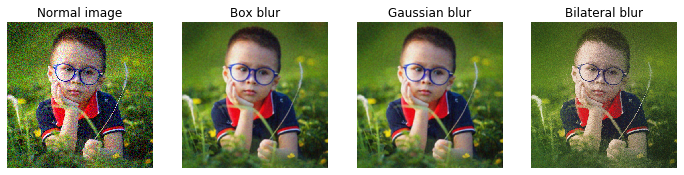

In [18]:
image_box = cv2.blur(image,(5,5))
image_gaussian = cv2.GaussianBlur(image,(5,5),4)
image_bilateral = cv2.bilateralFilter(image,-1,80,80)

plt.figure(figsize = (12,12))
plt.subplot(141)
plt.imshow(image[:,:,::-1])
plt.title('Normal image')
plt.axis('off')

plt.subplot(142)
plt.imshow(image_box[:,:,::-1])
plt.title('Box blur')
plt.axis('off')

plt.subplot(143)
plt.imshow(image_gaussian[:,:,::-1])
plt.title('Gaussian blur')
plt.axis('off')

plt.subplot(144)
plt.imshow(image_bilateral[:,:,::-1])
plt.title('Bilateral blur')
plt.axis('off')

In [21]:
#Sobel Filter
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/truth.png',cv2.IMREAD_GRAYSCALE)
if image is None:
    print("No image found")

In [23]:
sobelx = cv2.Sobel(image,cv2.CV_32F,1,0)
sobely = cv2.Sobel(image,cv2.CV_32F,0,1)

In [25]:
cv2.normalize(sobelx,dst = sobelx,alpha = 0,beta = 1,norm_type = cv2.NORM_MINMAX,dtype = cv2.CV_32F)
cv2.normalize(sobely,dst =  sobely,alpha = 0,beta = 1,norm_type = cv2.NORM_MINMAX,dtype = cv2.CV_32F)

array([[0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       ...,
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5],
       [0.5, 0.5, 0.5, ..., 0.5, 0.5, 0.5]], dtype=float32)

(-0.5, 511.5, 511.5, -0.5)

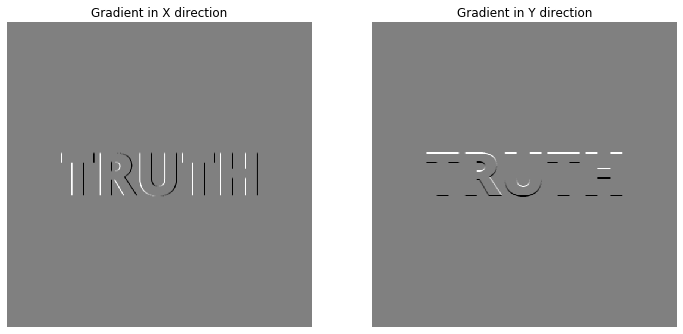

In [26]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(sobelx,cmap = 'gray')
plt.title("Gradient in X direction")
plt.axis('off')

plt.subplot(122)
plt.imshow(sobely,cmap= 'gray')
plt.title("Gradient in Y direction")
plt.axis('off')

In [28]:
#Laplacian for second order derivative
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/sample.jpg',cv2.IMREAD_GRAYSCALE)
if image is None:
    print("No image found")

In [29]:
image = cv2.GaussianBlur(image,(3,3),0,0)
image = cv2.Laplacian(image,cv2.CV_32F,3)

In [31]:
cv2.normalize(image,dst = sobelx,alpha = 0,beta = 1,norm_type = cv2.NORM_MINMAX,dtype = cv2.CV_32F)

array([[0.5489361 , 0.5361702 , 0.5531914 , ..., 0.5489361 , 0.5489361 ,
        0.5489361 ],
       [0.5361702 , 0.5574468 , 0.5489361 , ..., 0.5489361 , 0.5489361 ,
        0.5531914 ],
       [0.5489361 , 0.54468083, 0.5404255 , ..., 0.5574468 , 0.5574468 ,
        0.5361702 ],
       ...,
       [0.5489361 , 0.5531914 , 0.54468083, ..., 0.5617021 , 0.5574468 ,
        0.58297867],
       [0.5489361 , 0.5531914 , 0.54468083, ..., 0.5489361 , 0.5574468 ,
        0.5574468 ],
       [0.5489361 , 0.5531914 , 0.54468083, ..., 0.5148936 , 0.5404255 ,
        0.5404255 ]], dtype=float32)

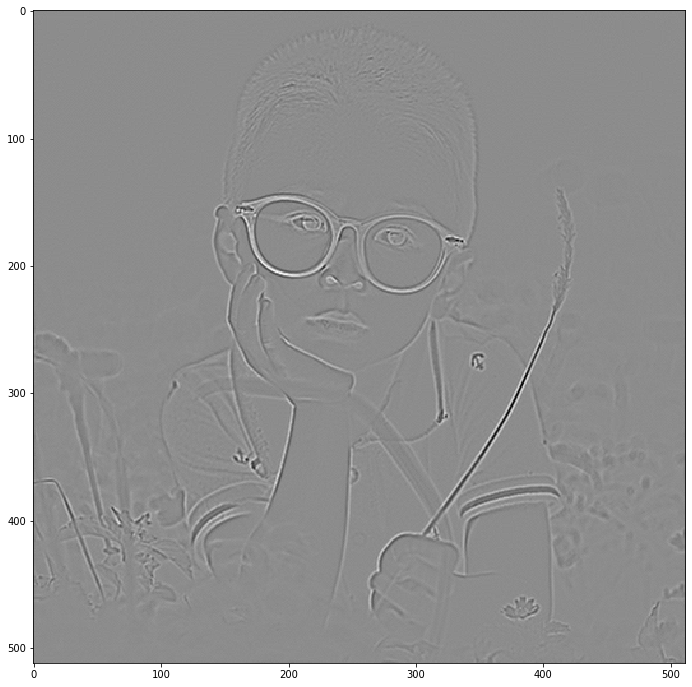

In [32]:
plt.figure(figsize=(12,12))
plt.imshow(image,cmap = 'gray')

In [33]:
#Sharpening the image
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/sample.jpg')
if image is None:
    print("No image found")

In [35]:
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]],dtype = 'int')

In [37]:
image_sharpened = cv2.filter2D(image,-1,sharpen_kernel)

(-0.5, 511.5, 511.5, -0.5)

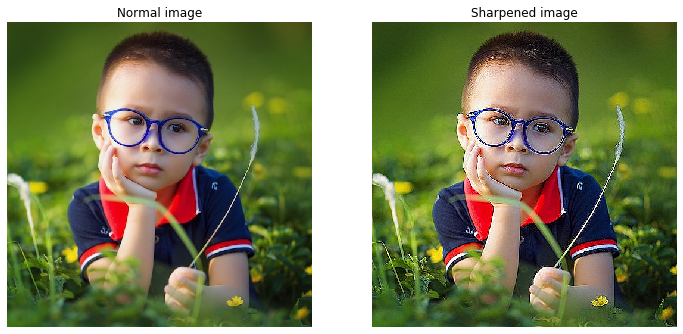

In [38]:
plt.figure(figsize=(12,12))
plt.subplot(121)
plt.imshow(image[:,:,::-1])
plt.title("Normal image")
plt.axis('off')

plt.subplot(122)
plt.imshow(image_sharpened[:,:,::-1])
plt.title("Sharpened image")
plt.axis('off')

In [39]:
#Detecting edges in the image
image = cv2.imread('/home/jash/Desktop/JashWork/opencv_courses/CV1/week4-python/data/images/sample.jpg',cv2.IMREAD_GRAYSCALE)
if image is None:
    print("No image found")

In [66]:
blur_image = cv2.GaussianBlur(image,(15,15),0,0)

In [67]:
image_edge = cv2.Canny(blur_image,225,240,apertureSize = 5)

(-0.5, 511.5, 511.5, -0.5)

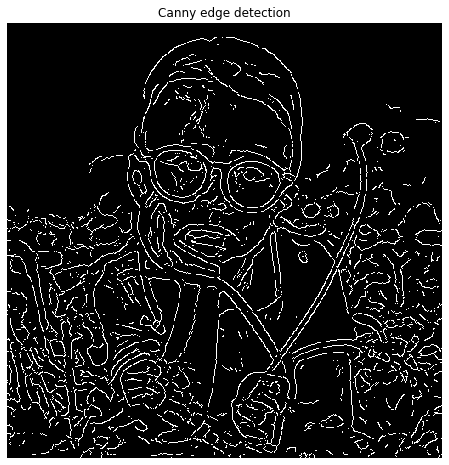

In [68]:
plt.figure(figsize=(8,8))
plt.imshow(image_edge,cmap = 'gray')
plt.title('Canny edge detection')
plt.axis('off')